<a href="https://colab.research.google.com/github/virf96/Analisis_Texto/blob/master/Clusterizacion_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import requests
from bs4 import BeautifulSoup

## Indicamos de que página descargaremos los enunciados

In [56]:
main_url='http://www.medicosypacientes.com/opinion'
req=requests.get(main_url)
soup=BeautifulSoup(req.text,'html.parser')

In [57]:
#Página de donde hacemos el scrappng de información
soup.title.text

'Opinión | Médicos y Pacientes'

In [58]:
#Contenido del scrapping
soup.find_all('p')

[<p style="text-align: center;"><a href="https://www.fpsomc.es/sites/default/files/ampliacion-pretaciones-catalogo-2020.pdf"><img alt="" src="/sites/default/files/BannerMyP_850x130-PrestacionesExtraordinarias_conlogo_1.gif" style="width: 1200px; height: 140px;"/></a></p>,
 <p><a class="inscribete" href="http://eepurl.com/czk3e1" target="_blank" title="">Inscríbete</a></p>,
 <p>
 <div class="hemeroteca"><a href="/buscar">Hemeroteca</a></div></p>,
 <p style="text-align: justify;">El Dr. Jacinto Bátiz, director del Instituto para Cuidar Mejor Hospital San Juan de Dios de Santurtzi, analiza en este artículo el sufrimiento que ha creado la pandemia de COVID19 en los pacientes por encontrarse cerca de la muerte y lejos de sus familias</p>,
 <p style="text-align: justify;">El Dr. Alfonso Carmona, presidente del Colegio de Médicos de Sevilla, muestra su satisfacción con la medida anunciada por la Consejería de Salud y Familias de la Junta de Andalucía de extender el Complemento Específico por 

In [59]:
soup.find_all('p')[5]

<p style="text-align: justify;">El Dr. José Ignacio Landa,  Cirujano General y del Aparato Digestivo y miembro del Consejo Asesor del Consejo General de Colegios Oficiales de Médicos (CGCOM),  subraya en este artículo que “la Organización Mundial de la Salud (OMS) en los últimos años ha mostrado ciertas debilidades por la República Popular China y no parece que haya gestionado de una forma aceptable esta pandemia”</p>

In [60]:
#Tamaño de la lista
len(soup.find_all('p'))

30

In [61]:
print(soup.get_text())













Opinión | Médicos y Pacientes

@import url("http://www.medicosypacientes.com/modules/system/system.base.css?qec6xp");
@import url("http://www.medicosypacientes.com/modules/system/system.menus.css?qec6xp");
@import url("http://www.medicosypacientes.com/modules/system/system.messages.css?qec6xp");
@import url("http://www.medicosypacientes.com/modules/system/system.theme.css?qec6xp");


@import url("http://www.medicosypacientes.com/sites/all/modules/comment_notify/comment_notify.css?qec6xp");
@import url("http://www.medicosypacientes.com/sites/all/modules/adaptive_image/css/adaptive-image.css?qec6xp");
@import url("http://www.medicosypacientes.com/modules/aggregator/aggregator.css?qec6xp");
@import url("http://www.medicosypacientes.com/modules/comment/comment.css?qec6xp");
@import url("http://www.medicosypacientes.com/sites/all/modules/date/date_api/date.css?qec6xp");
@import url("http://www.medicosypacientes.com/sites/all/modules/fences/field.css?qec6xp");
@import url("http:/

## Prepricesamiento de información

In [62]:

hrefs=[]
for i in range(3,12):
  opinion=soup.find_all('p')[i]
  hrefs.append(opinion)


In [63]:
hrefs

[<p style="text-align: justify;">El Dr. Jacinto Bátiz, director del Instituto para Cuidar Mejor Hospital San Juan de Dios de Santurtzi, analiza en este artículo el sufrimiento que ha creado la pandemia de COVID19 en los pacientes por encontrarse cerca de la muerte y lejos de sus familias</p>,
 <p style="text-align: justify;">El Dr. Alfonso Carmona, presidente del Colegio de Médicos de Sevilla, muestra su satisfacción con la medida anunciada por la Consejería de Salud y Familias de la Junta de Andalucía de extender el Complemento Específico por Dedicación Exclusiva, de manera que lo puedan percibir todos los médicos con independencia de su régimen de compatibilidad de actividad.</p>,
 <p style="text-align: justify;">El Dr. José Ignacio Landa,  Cirujano General y del Aparato Digestivo y miembro del Consejo Asesor del Consejo General de Colegios Oficiales de Médicos (CGCOM),  subraya en este artículo que “la Organización Mundial de la Salud (OMS) en los últimos años ha mostrado ciertas de

### Partimos el texto para quedarnos solo con el comentario

In [64]:
str(hrefs[0]).split(">", 2)[1]

'El Dr. Jacinto Bátiz, director del Instituto para Cuidar Mejor Hospital San Juan de Dios de Santurtzi, analiza en este artículo el sufrimiento que ha creado la pandemia de COVID19 en los pacientes por encontrarse cerca de la muerte y lejos de sus familias</p'

In [65]:
comment=[]
for i in range(0,len(hrefs)):
  opinion=str(hrefs[i]).split(">", 2)[1]
  comment.append(opinion)


In [66]:
comment

['El Dr. Jacinto Bátiz, director del Instituto para Cuidar Mejor Hospital San Juan de Dios de Santurtzi, analiza en este artículo el sufrimiento que ha creado la pandemia de COVID19 en los pacientes por encontrarse cerca de la muerte y lejos de sus familias</p',
 'El Dr. Alfonso Carmona, presidente del Colegio de Médicos de Sevilla, muestra su satisfacción con la medida anunciada por la Consejería de Salud y Familias de la Junta de Andalucía de extender el Complemento Específico por Dedicación Exclusiva, de manera que lo puedan percibir todos los médicos con independencia de su régimen de compatibilidad de actividad.</p',
 'El Dr. José Ignacio Landa,\xa0 Cirujano General y del Aparato Digestivo y miembro del Consejo Asesor del Consejo General de Colegios Oficiales de Médicos (CGCOM),\xa0 subraya en este artículo que “la Organización Mundial de la Salud (OMS) en los últimos años ha mostrado ciertas debilidades por la República Popular China y no parece que haya gestionado de una forma a

In [72]:
str(comment[0]).split("<", 2)[0]

'El Dr. Jacinto Bátiz, director del Instituto para Cuidar Mejor Hospital San Juan de Dios de Santurtzi, analiza en este artículo el sufrimiento que ha creado la pandemia de COVID19 en los pacientes por encontrarse cerca de la muerte y lejos de sus familias'

In [75]:
comments=[]
for i in range(0,len(comment)):
  opinion=str(comment[i]).split("<", 2)[0]
  comments.append(opinion)


In [76]:
comments

['El Dr. Jacinto Bátiz, director del Instituto para Cuidar Mejor Hospital San Juan de Dios de Santurtzi, analiza en este artículo el sufrimiento que ha creado la pandemia de COVID19 en los pacientes por encontrarse cerca de la muerte y lejos de sus familias',
 'El Dr. Alfonso Carmona, presidente del Colegio de Médicos de Sevilla, muestra su satisfacción con la medida anunciada por la Consejería de Salud y Familias de la Junta de Andalucía de extender el Complemento Específico por Dedicación Exclusiva, de manera que lo puedan percibir todos los médicos con independencia de su régimen de compatibilidad de actividad.',
 'El Dr. José Ignacio Landa,\xa0 Cirujano General y del Aparato Digestivo y miembro del Consejo Asesor del Consejo General de Colegios Oficiales de Médicos (CGCOM),\xa0 subraya en este artículo que “la Organización Mundial de la Salud (OMS) en los últimos años ha mostrado ciertas debilidades por la República Popular China y no parece que haya gestionado de una forma aceptab

### Continuamos limpiando el texto de caracteres que no sirvan

In [78]:
import re

In [85]:
comments[2]

'El Dr. José Ignacio Landa,\xa0 Cirujano General y del Aparato Digestivo y miembro del Consejo Asesor del Consejo General de Colegios Oficiales de Médicos (CGCOM),\xa0 subraya en este artículo que “la Organización Mundial de la Salud (OMS) en los últimos años ha mostrado ciertas debilidades por la República Popular China y no parece que haya gestionado de una forma aceptable esta pandemia”'

In [83]:
#Quitamos sintaxis raras
a = comments[2]
b = "\xa0"
for char in b:
  a = a.replace(char,"")
print(a)


El Dr. José Ignacio Landa, Cirujano General y del Aparato Digestivo y miembro del Consejo Asesor del Consejo General de Colegios Oficiales de Médicos (CGCOM), subraya en este artículo que “la Organización Mundial de la Salud (OMS) en los últimos años ha mostrado ciertas debilidades por la República Popular China y no parece que haya gestionado de una forma aceptable esta pandemia”


In [86]:
#Sustituimos string
comments[2]=a

In [87]:
#Comentarios 
comments

['El Dr. Jacinto Bátiz, director del Instituto para Cuidar Mejor Hospital San Juan de Dios de Santurtzi, analiza en este artículo el sufrimiento que ha creado la pandemia de COVID19 en los pacientes por encontrarse cerca de la muerte y lejos de sus familias',
 'El Dr. Alfonso Carmona, presidente del Colegio de Médicos de Sevilla, muestra su satisfacción con la medida anunciada por la Consejería de Salud y Familias de la Junta de Andalucía de extender el Complemento Específico por Dedicación Exclusiva, de manera que lo puedan percibir todos los médicos con independencia de su régimen de compatibilidad de actividad.',
 'El Dr. José Ignacio Landa, Cirujano General y del Aparato Digestivo y miembro del Consejo Asesor del Consejo General de Colegios Oficiales de Médicos (CGCOM), subraya en este artículo que “la Organización Mundial de la Salud (OMS) en los últimos años ha mostrado ciertas debilidades por la República Popular China y no parece que haya gestionado de una forma aceptable esta 

## Procedemos a:
$\bullet$ Quitar signos de puntuación

$\bullet$ Poner todo en mínusculas

$\bullet$ Normalizar el texto **(steamming, lematización)**

$\bullet$ Eliminar palabras de parada

In [88]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
import string 
import random

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [92]:
raw=comments

In [96]:
#Convertimos a minúscula

commen=[]
for i in range(0,len(comments)):
  opinion=raw[i].lower() 
  commen.append(opinion)

In [97]:
commen

['el dr. jacinto bátiz, director del instituto para cuidar mejor hospital san juan de dios de santurtzi, analiza en este artículo el sufrimiento que ha creado la pandemia de covid19 en los pacientes por encontrarse cerca de la muerte y lejos de sus familias',
 'el dr. alfonso carmona, presidente del colegio de médicos de sevilla, muestra su satisfacción con la medida anunciada por la consejería de salud y familias de la junta de andalucía de extender el complemento específico por dedicación exclusiva, de manera que lo puedan percibir todos los médicos con independencia de su régimen de compatibilidad de actividad.',
 'el dr. josé ignacio landa, cirujano general y del aparato digestivo y miembro del consejo asesor del consejo general de colegios oficiales de médicos (cgcom), subraya en este artículo que “la organización mundial de la salud (oms) en los últimos años ha mostrado ciertas debilidades por la república popular china y no parece que haya gestionado de una forma aceptable esta 

In [165]:
#Quitamos palabras de parada
import sys
commentaries=[]

userstring = commen[0].split(" ")
list =["el","con","de","las","del","para","en","este","que","ha","la","en","los","por","sus","y","su","lo","una","esta","cómo"]
another_list = []
for x in userstring:
    if x not in list:           # Compara la lista y remueve
        another_list.append(x)  
m = " ".join(another_list)
commentaries.append(m)

userstring = commen[1].split(" ")
list =["el","con","de","las","del","para","en","este","que","ha","la","en","los","por","sus","y","su","lo","una","esta","cómo"]
another_list = []
for x in userstring:
    if x not in list:           # Compara la lista y remueve
        another_list.append(x)  
m = " ".join(another_list)
commentaries.append(m)

userstring = commen[2].split(" ")
list =["el","con","de","las","del","para","en","este","que","ha","la","en","los","por","sus","y","su","lo","una","esta","cómo"]
another_list = []
for x in userstring:
    if x not in list:           # Compara la lista y remueve
        another_list.append(x)  
m = " ".join(another_list)
commentaries.append(m)

userstring = commen[3].split(" ")
list =["el","con","de","las","del","para","en","este","que","ha","la","en","los","por","sus","y","su","lo","una","esta","cómo"]
another_list = []
for x in userstring:
    if x not in list:           # Compara la lista y remueve
        another_list.append(x)  
m = " ".join(another_list)
commentaries.append(m)

userstring = commen[4].split(" ")
list =["el","con","de","las","del","para","en","este","que","ha","la","en","los","por","sus","y","su","lo","una","esta","cómo"]
another_list = []
for x in userstring:
    if x not in list:           # Compara la lista y remueve
        another_list.append(x)  
m = " ".join(another_list)
commentaries.append(m)

userstring = commen[5].split(" ")
list =["el","con","de","las","del","para","en","este","que","ha","la","en","los","por","sus","y","su","lo","una","esta","cómo"]
another_list = []
for x in userstring:
    if x not in list:           # Compara la lista y remueve
        another_list.append(x)  
m = " ".join(another_list)
commentaries.append(m)

userstring = commen[6].split(" ")
list =["el","con","de","las","del","para","en","este","que","ha","la","en","los","por","sus","y","su","lo","una","esta","cómo"]
another_list = []
for x in userstring:
    if x not in list:           # Compara la lista y remueve
        another_list.append(x)  
m = " ".join(another_list)
commentaries.append(m)

userstring = commen[7].split(" ")
list =["el","con","de","las","del","para","en","este","que","ha","la","en","los","por","sus","y","su","lo","una","esta","cómo"]
another_list = []
for x in userstring:
    if x not in list:           # Compara la lista y remueve
        another_list.append(x)  
m = " ".join(another_list)
commentaries.append(m)

userstring = commen[8].split(" ")
list =["el","con","de","las","del","para","en","este","que","ha","la","en","los","por","sus","y","su","lo","una","esta","cómo"]
another_list = []
for x in userstring:
    if x not in list:           # Compara la lista y remueve
        another_list.append(x)  
m = " ".join(another_list)
commentaries.append(m)

In [166]:
commentaries

['dr. jacinto bátiz, director instituto cuidar mejor hospital san juan dios santurtzi, analiza artículo sufrimiento creado pandemia covid19 pacientes encontrarse cerca muerte lejos familias',
 'dr. alfonso carmona, presidente colegio médicos sevilla, muestra satisfacción medida anunciada consejería salud familias junta andalucía extender complemento específico dedicación exclusiva, manera puedan percibir todos médicos independencia régimen compatibilidad actividad.',
 'dr. josé ignacio landa, cirujano general aparato digestivo miembro consejo asesor consejo general colegios oficiales médicos (cgcom), subraya artículo “la organización mundial salud (oms) últimos años mostrado ciertas debilidades república popular china no parece haya gestionado forma aceptable pandemia”',
 'dr. santiago santa cruz, presidente colegio médicos salamanca, analiza artículo falta médicos acciones políticas deberían ejecutarse corregir problema',
 'dr. antonio ares, delegado territorial bahía cádiz colegio mé

### Nube de palabras

In [182]:
import pandas as pd 
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [183]:
stop_words_sp = set(stopwords.words('spanish'))

In [185]:
print(len(stop_words_sp ))
print(stop_words_sp )

313
{'fueseis', 'ha', 'hubieran', 'tuviese', 'todo', 'nuestra', 'habríamos', 'estuvieron', 'estuviesen', 'tanto', 'estarían', 'tenían', 'habrían', 'tuviera', 'estaréis', 'están', 'mi', 'estuviera', 'serás', 'teniendo', 'tu', 'hayáis', 'éramos', 'del', 'muchos', 'eres', 'tienen', 'tengan', 'hubiéramos', 'hayan', 'tenida', 'nosotros', 'estás', 'tenía', 'eso', 'nos', 'estarás', 'fuiste', 'seréis', 'habré', 'habías', 'fuera', 'tuvieses', 'estamos', 'teníais', 'esas', 'somos', 'fueses', 'eras', 'seáis', 'unos', 'mío', 'sus', 'está', 'tuvieran', 'al', 'seríais', 'vuestras', 'estada', 'erais', 'vuestra', 'estemos', 'sea', 'sin', 'fuéramos', 'estos', 'hubo', 'ellos', 'estando', 'estaríais', 'hubiste', 'a', 'durante', 'cual', 'le', 'estadas', 'habiendo', 'fueran', 'el', 'suya', 'estáis', 'estaremos', 'se', 'esos', 'tendréis', 'vosotros', 'ella', 'estuvimos', 'hemos', 'habrá', 'sean', 'tuvieras', 'nosotras', 'les', 'fuese', 'tendrán', 'tuviste', 'quien', 'que', 'estarán', 'tengamos', 'los', 'él'

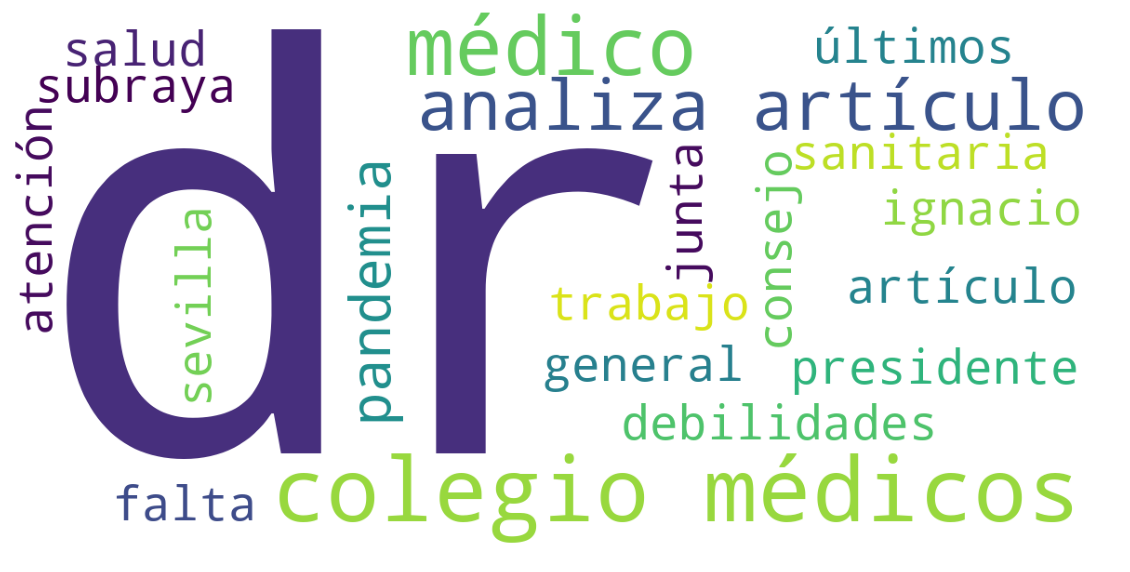

In [191]:
 wordcloud = WordCloud(background_color='white',
        stopwords=stop_words_sp,
        max_words=20,
        max_font_size=200, 
        scale=3,
        random_state=3).generate(str(commentaries))


wordcloud.recolor(random_state=1)
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Procedamos a codificar las palabras

In [192]:
#Lematizador
lemmer=nltk.stem.WordNetLemmatizer()

#Función para lematizar uno a uno los wordtokens
def LemTokens(tokens):
  return [lemmer.lemmatize(token) for token in tokens]

#Removemos signos de puntuación
remove_punct_dict = dict((ord(punct),None) for punct in string.punctuation)

#Se le da un texto a la función y está le elimina los signos de puntuación y la tokeniza
def LemNormalize(text):
  return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))


#for i in range(0,len(commentaries)):

 # tokens = LemTokens(commentaries[i]) 
      
#comment_words += " ".join(tokens)+" "